In [1]:
from microcnn.value import Value
from microcnn.nn import Tanh, Model, Layer, LeakyReLU, CrossEntropyLoss
from microcnn.nn import Softmax, SGD, SoftmaxCrossEntropyLoss
from utils import to_dot
from graphviz import Source

a = Value(0.8, op='in')
# b = Value(0.5)
# c = Value(1.2)

out_gt = [Value(1.0, op='gt'), Value(0.0, op='gt'), Value(0.0, op='gt')]

# m0 = Model([Layer(1,3, LeakyReLU()),
#             Layer(3,3, Softmax())])

m0 = Model([Layer(1,3, LeakyReLU()),
            Layer(3,3, None)])

# m0 = Model([Layer(1,3, Softmax())])

# loss_fc = CrossEntropyLoss()
loss_fc = SoftmaxCrossEntropyLoss()
optimizer = SGD()

[0.8895151082942157, 0.05500016058348405, 0.05548473112230034]


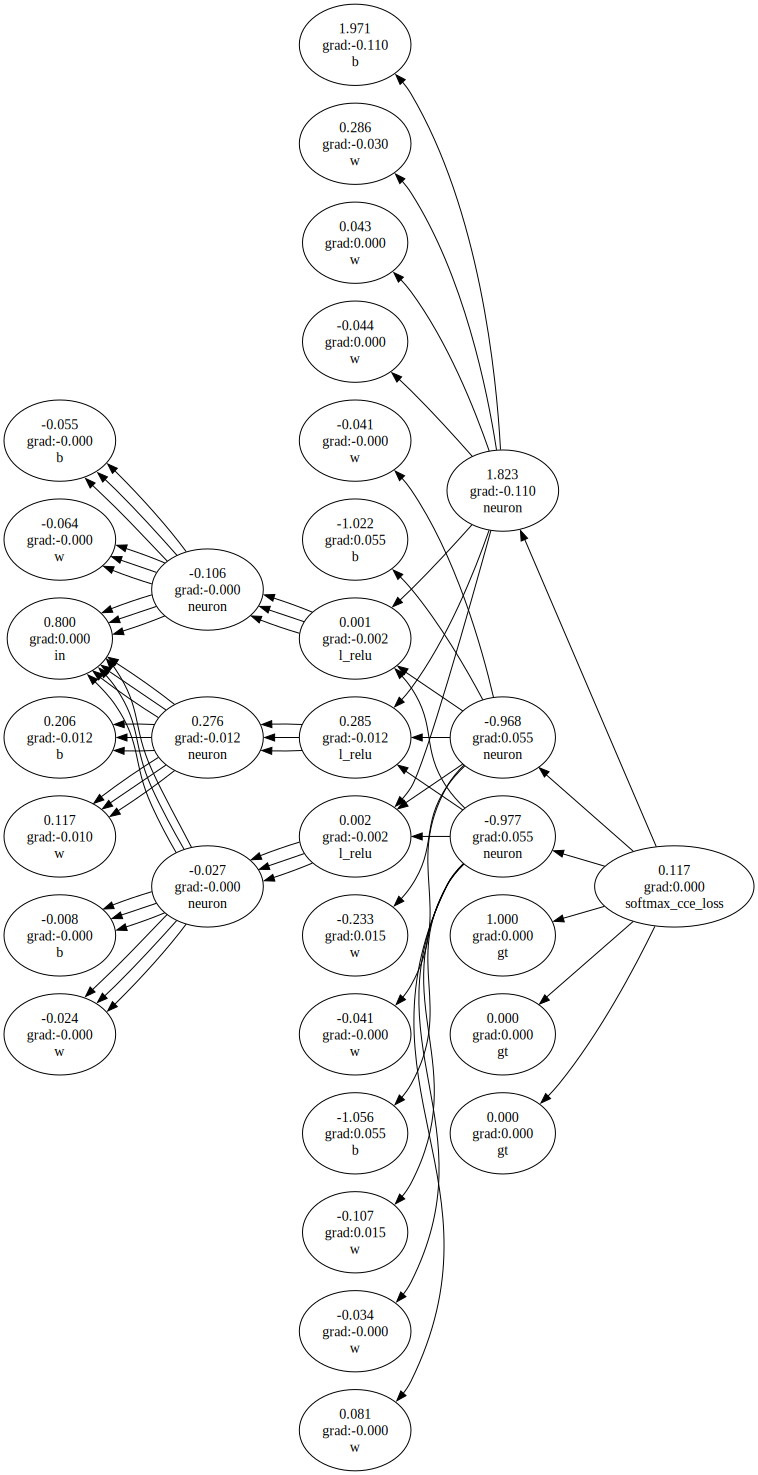

In [2]:
for epoch in range(10):
    m0_out = m0.forward([a])

    loss = loss_fc.forward(m0_out, out_gt)
    
    m0.zero_grad()
    
    loss_fc.backward()
    m0.backward()
    # print(loss.data)
    
    optimizer.step(m0.parameters(), lr=0.1)


print(loss_fc.softmax_data)
# m0.zero_grad()

# loss_fc.backward()
# m0.backward()

dot = to_dot(loss)
Source(dot.source)

In [ ]:
from microcnn.value import Value
from microcnn.nn import Tanh, Neuron, Model, Layer, ReLU, SGD, RMSLoss, LeakyReLU
import math
from utils import to_dot
from graphviz import Source

m0 = Model([Layer(2,1, LeakyReLU()),
            Layer(1,1, LeakyReLU()),
            Layer(1,2)])

# m0 = Model([Layer(1,2, LeakyReLU()),
#             Layer(2,1, LeakyReLU())])

optimizer = SGD()
loss_fc = RMSLoss()

In [ ]:
a = Value(2.0, op='in')
b = Value(3.0, op='in')

for e in range(100):
    c = m0.forward([a, b])

    loss = loss_fc.forward(c, [Value(4.0, op='gt'), Value(19.0, op='gt')])
    # loss = loss_fc.forward(c, [Value(30.0, op='gt')])

    loss_fc.backward()
    m0.backward()
    
    optimizer.step(m0.parameters(), lr=0.1)

dot = to_dot(loss)
Source(dot.source)